# Importing all required libraries

In [1]:
import pandas as pd
import os

# Importing the data

In [2]:
files=[files for files in os.listdir("D:/datasets/sales_data")]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("D:/datasets/sales_data/"+file)
    all_months_data=all_months_data.append(df,ignore_index=True)

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Checking the null values

In [5]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# Droping null values

In [6]:
df_1=all_months_data.dropna(how="all")
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df_1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Dropping rows with order date other than date and time

In [8]:
df_1=df_1.drop(df_1[df_1["Order Date"].str[0:2]=='Or'].index)
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
df_1.at[2,"Order Date"]

'04/07/19 22:30'

# Creating new column month

In [11]:
df_1["month"]=df_1["Order Date"].str[0:2]
df_1["month"]=df_1["month"].astype('int32')
df_1["Quantity Ordered"]=df_1["Quantity Ordered"].astype('float32')
df_1["Price Each"]=df_1["Price Each"].astype("float32")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float32
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
dtypes: float32(2), int32(1), object(4)
memory usage: 13.3+ MB


# Finding the sales of that particular orderid

In [12]:
df_1["sales"]=df_1["Quantity Ordered"]*df_1["Price Each"]
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2.0,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1.0,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1.0,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1.0,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1.0,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


# Finding the sales of that particular each month

In [13]:
df_month=df_1.groupby(by="month").sum()
df_month.head()

,Quantity Ordered,Price Each,sales
month,,,
1,10903.0,1811768.375,1822256.75
2,13449.0,2188884.750,2202022.50
3,17005.0,2791207.750,2807100.25
4,20558.0,3367671.000,3390670.25
5,18667.0,3135125.000,3152606.75


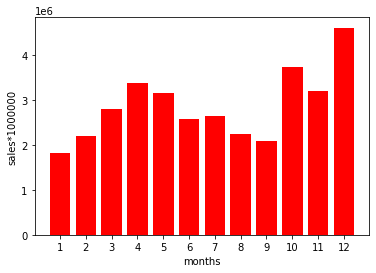

In [14]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,df_month['sales'],color="red")
plt.xticks(months)
plt.ylabel("sales*1000000")
plt.xlabel("months")
plt.show()

In [15]:
#month 12 has high sales
df_1.groupby(by="month")["sales"].sum().idxmax()

12

# To get the city from puchase address 

In [16]:
import numpy as np
x=list(df_1["Purchase Address"].str.split(','))
x=np.array(x)
df_1["city"]=x[:,1]

In [17]:
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2.0,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston
3,176560,Google Phone,1.0,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles
4,176560,Wired Headphones,1.0,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles
5,176561,Wired Headphones,1.0,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles


# To find the sales with respect to cities

In [18]:
df_city=df_1.groupby(by="city").sum()
df_city

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta,16602.0,2779908.250,104794,2795498.50
Austin,11153.0,1809873.625,69829,1819581.75
Boston,22528.0,3637409.750,141112,3661642.00
Dallas,16730.0,2752627.750,104620,2767975.50
Los Angeles,33289.0,5421435.000,208325,5452571.00
New York City,27932.0,4635371.000,175741,4664317.50
Portland,14053.0,2307747.500,87765,2320490.50
San Francisco,50239.0,8211461.500,315520,8262204.00
Seattle,16553.0,2733296.000,104941,2747755.50


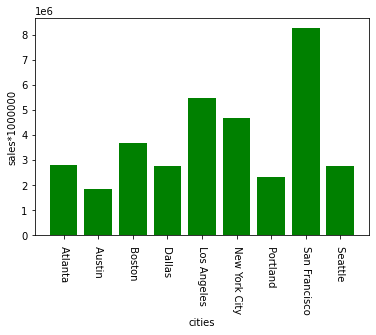

In [19]:
plt.bar(df_city.index,df_city['sales'],color="green")
plt.xticks(df_city.index)
plt.ylabel("sales*1000000")
plt.xlabel("cities")
plt.xticks(rotation=-90)
plt.show()

# Getting the hour from the time of purchase

In [20]:
df_1["Order Date"]=pd.to_datetime(df_1["Order Date"])
df_1["hour"]=df_1["Order Date"].dt.hour
df_1["inute"]=df_1["Order Date"].dt.minute
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,inute
0,176558,USB-C Charging Cable,2.0,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,8,46
2,176559,Bose SoundSport Headphones,1.0,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,22,30
3,176560,Google Phone,1.0,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,14,38
5,176561,Wired Headphones,1.0,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,9,27


# Finding sales according to the hour in a day

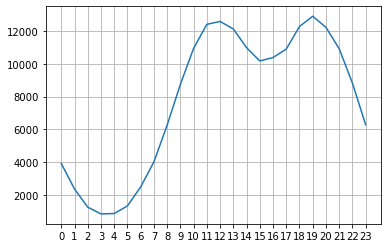

In [21]:
y=df_1.groupby(by="hour").count()
plt.plot(y.index,y["Order ID"])
plt.xticks(y.index)
plt.grid()
plt.show()

# Finding the products bought together

In [22]:
df=df_1[df_1["Order ID"].duplicated(keep=False)]
df["grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df=df[["Order ID","grouped"]].drop_duplicates()
df.head()

C:\Users\MANITEJ\AppData\Local\Temp/ipykernel_2656/2470771180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df["grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print("{} : {}".format(key,value))

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


# Quantities of each product ordered

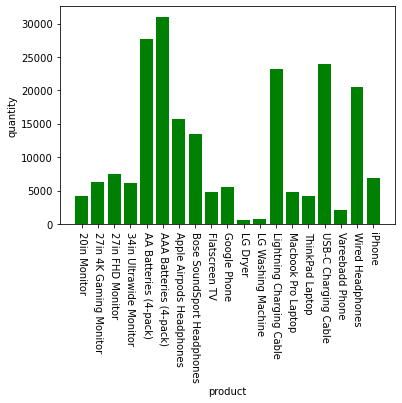

In [51]:
product_group=df_1.groupby(by="Product")
quantity_ordered=product_group.sum()["Quantity Ordered"]
products=[product for product, df in product_group]
plt.bar(products,quantity_ordered,color="green")

plt.ylabel("quantity")
plt.xlabel("product")
plt.xticks(rotation=-90)
plt.show()

# Quantites and price opf each product ordered

C:\Users\MANITEJ\AppData\Local\Temp/ipykernel_2656/571397745.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


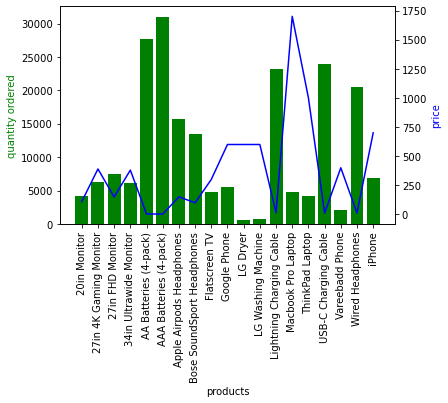

In [62]:
prices=df_1.groupby('Product').mean()["Price Each"]
fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,color='b')
ax1.set_xlabel("products")
ax1.set_ylabel("quantity ordered",color='g')
ax2.set_ylabel("price",color='b')
ax1.set_xticklabels(products,rotation='vertical')
plt.show()